# Classification Problem

# Attribute Information:

Listing of attributes:

>50K, <=50K.

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from EDA import data
from standard_scalar import standardization
from sklearn.model_selection import train_test_split
from traintest_split import split
from connection_db import database

In [2]:
#loading the dataset
path = r"C:\Users\Thanmai\INEURON\Income_data.xlsx"
obj = data()
df = obj.load_data(path)
df = df.drop('education', axis = 1)
#taking random sample of 20,000 records from 48,000+ records
df = df.sample(15000)

In [3]:
df.isnull().sum()

age                  0
worktype           865
fnlwgt               0
education_num        0
maritial_status      0
occupation         868
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     269
salary               0
dtype: int64

We have many null values in the dataset.

Now, let's impute the dataset with most frequent values in the dataset.

In [4]:
imputed_df = obj.check_null(df)

In [5]:
imputed_df.isnull().sum()

age                0
worktype           0
fnlwgt             0
education_num      0
maritial_status    0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
salary             0
dtype: int64

I have successfully imputed the null values.

Let's proceed with the label encoding.

In [6]:
from Label_encoding import encoding
obj2 = encoding()
imputed_df = obj2.label_encoding(imputed_df)

I'm done with encoding, let's review the data.

In [7]:
imputed_df.head()

,age,worktype,fnlwgt,education_num,maritial_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary
0,9,3,6515,8,4,5,1,4,1,0,0,39,37,0
1,33,3,5782,12,0,7,1,4,1,0,0,39,37,0
2,33,3,10464,8,2,13,0,4,1,0,0,39,37,1
3,13,3,4037,12,2,9,0,4,1,0,0,39,37,3
4,18,3,9813,12,2,11,0,4,1,83,0,47,37,3


Now let's check the datatypes of all the features.

In [8]:
# Data info & Central tendencies
obj.data_analysis(imputed_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              15000 non-null  int32
 1   worktype         15000 non-null  int32
 2   fnlwgt           15000 non-null  int32
 3   education_num    15000 non-null  int32
 4   maritial_status  15000 non-null  int32
 5   occupation       15000 non-null  int32
 6   relationship     15000 non-null  int32
 7   race             15000 non-null  int32
 8   gender           15000 non-null  int32
 9   capital_gain     15000 non-null  int32
 10  capital_loss     15000 non-null  int32
 11  hours_per_week   15000 non-null  int32
 12  native_country   15000 non-null  int32
 13  salary           15000 non-null  int32
dtypes: int32(14)
memory usage: 820.4 KB
None
                   count         mean          std  min     25%     50%  \
age              15000.0    21.658267    13.881443  0.0    11.0   

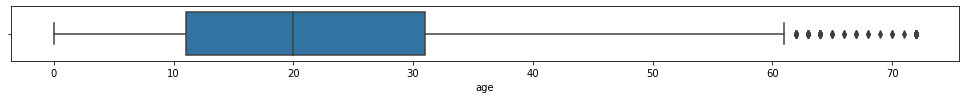

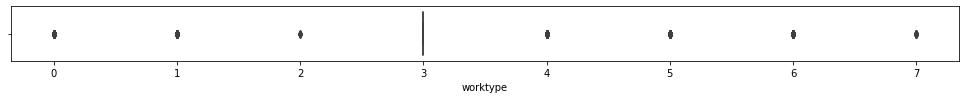

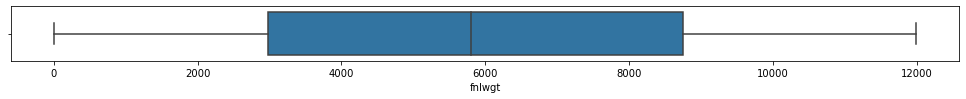

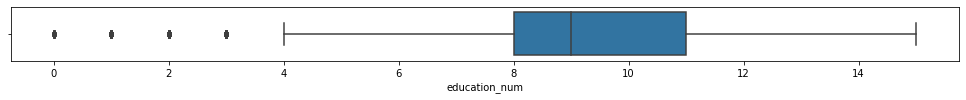

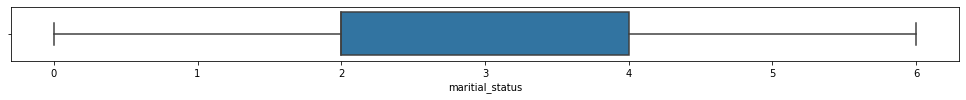

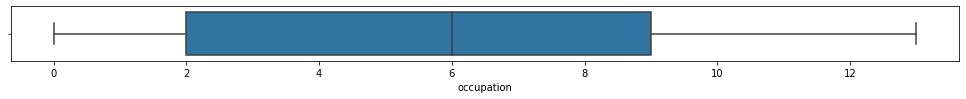

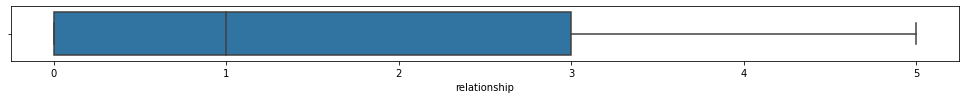

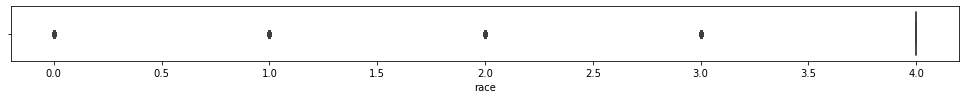

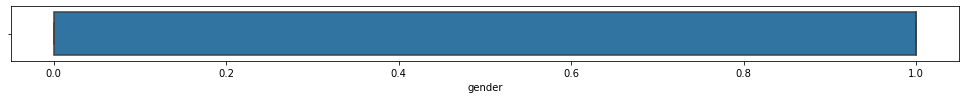

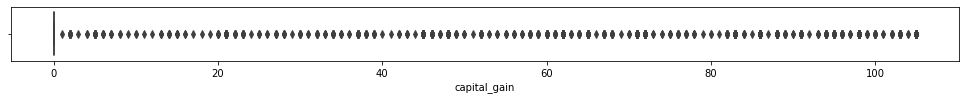

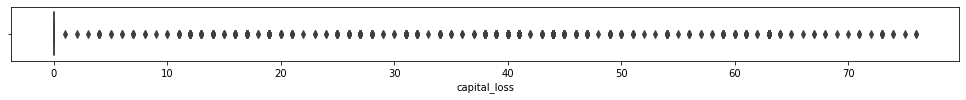

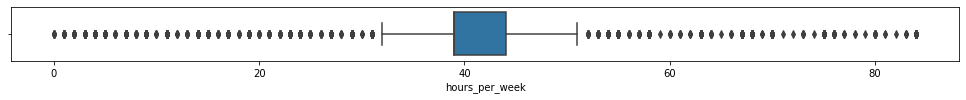

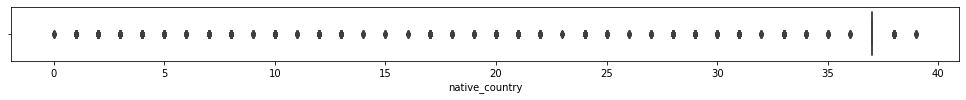

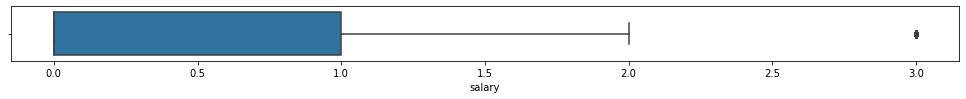

In [9]:
# Let's check for outliers
obj.outliers(imputed_df)

Even though there are outliers in the data, I don't want to manipulate the data. If we manipulate the outliers, there is a chance that we might loose some important data and that might effect the model.

Here i'm establishing the connection to import the cleaned dataset into mongodb.

In [10]:
# Loading imputed data to Mongodb and exporting the data for model building
obj2 = database()
path = 'C:/Users/Thanmai/INEURON/Project//Income_data_json.json'
database_name = 'Project'
table_name = 'Income_data'
obj2.connecting_mongodb(imputed_df, path, table_name, database_name)

Database(MongoClient(host=['thanmai-shard-00-01.oczr5.mongodb.net:27017', 'thanmai-shard-00-02.oczr5.mongodb.net:27017', 'thanmai-shard-00-00.oczr5.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-efvwgk-shard-0', tls=True), 'test')


I have successfully establised the connection and imported the cleaned data.
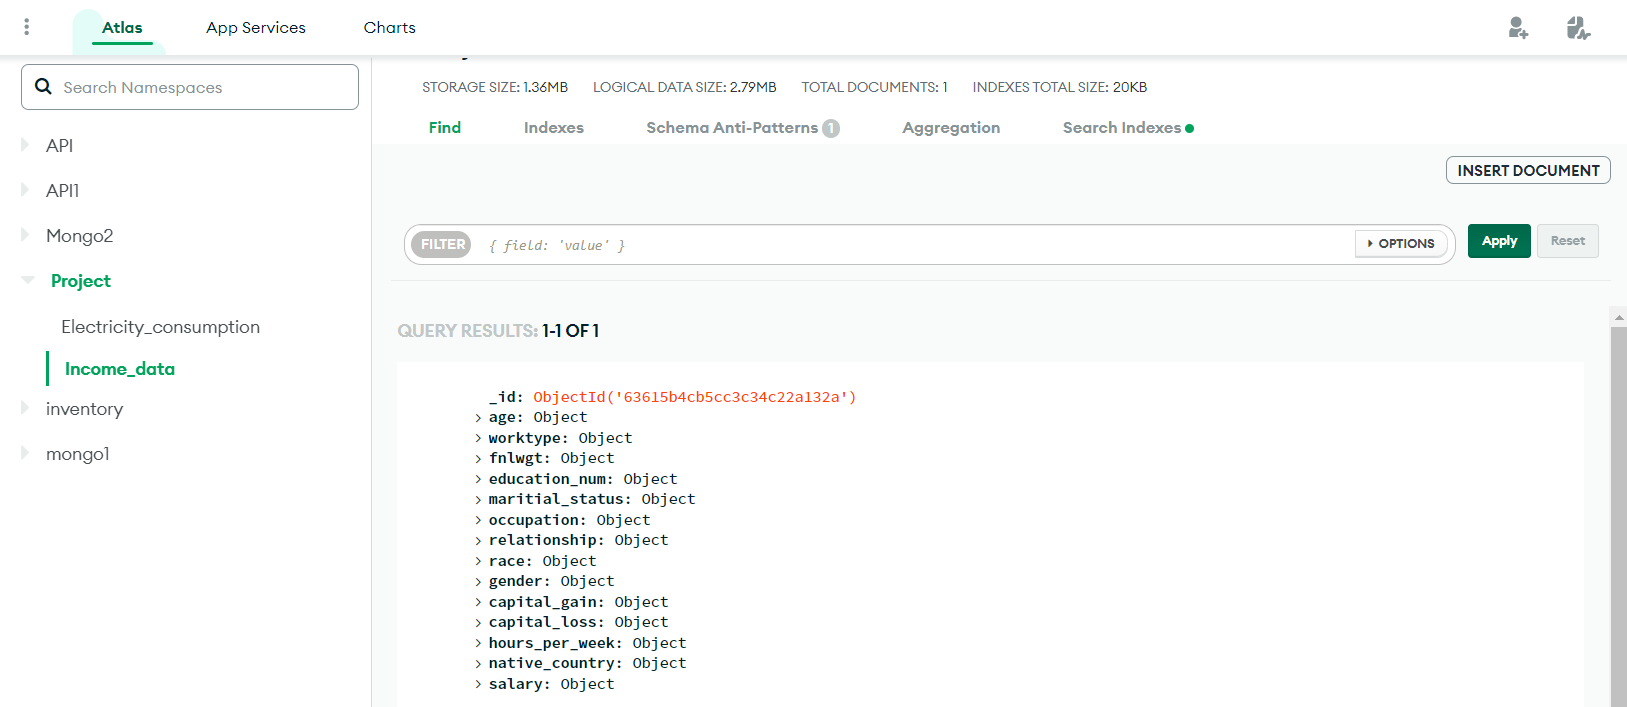
Now I have to fetch the data from database for model building.

In [11]:
data = obj2.fetch_data(table_name, database_name)

I have successfully exported the data, but the data is in json format. So, we have convert the json data to pandas dataframe to use the dataset for model building.

In [12]:
import pandas as pd
exported_df = pd.DataFrame(data)
exported_df = exported_df.drop('_id', axis = 1)

I have successfully converted the json data to pandas dataframe.

Let's proceed further by performing train test split.

In [13]:
# Train Test Split
X = exported_df.drop('salary', axis = 1)
y = exported_df['salary']
obj3 = split()
X_train, X_test, y_train, y_test = obj3.data_split(X,y)

Let's check the length of the data.

In [14]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

10500 10500
4500 4500


In [15]:
# Standardization
obj4 = standardization()
X_train_transformed, X_test_transformed = obj4.standardize_data(X_train, X_test)

[[ 0.1624646   1.663704    0.74354617 ... -0.20959007 -0.00716958
   0.25433925]
 [ 1.24405114  1.663704    1.6579294  ... -0.20959007  0.83207866
   0.25433925]
 [-0.48648733 -0.09851652 -0.36886012 ... -0.20959007 -0.00716958
   0.25433925]
 ...
 [-1.20754502 -0.09851652 -1.61062968 ... -0.20959007 -0.84641782
   0.25433925]
 [ 1.09983961  1.663704   -0.18733899 ... -0.20959007 -0.00716958
   0.25433925]
 [ 0.59509922  2.54481426 -0.81411731 ... -0.20959007  0.83207866
   0.25433925]]


In [16]:
#Logistic regression model 
from Logistic_regression import logistic
obj5 = logistic()
log_reg_pred = obj5.logistic_regression(X_train_transformed, y_train, X_test_transformed, y_test)
print("Actual vs Predicted Values of Logistic regression Model")
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': log_reg_pred})
dataset.head(10)

Actual vs Predicted Values of Logistic regression Model


,Actual,Predicted
1670,0,0
13379,1,0
10234,1,0
4719,1,0
7003,0,0
2831,1,0
13014,1,0
11979,0,0
8610,0,0
519,1,0


In [17]:
# Support vector classifier
from svc import support_vector_classifier
obj6 = support_vector_classifier()
svc_pred = obj6.svm_classifier(X_train_transformed, y_train, X_test_transformed, y_test)
print("Actual vs Predicted Values of Support vector classifier Model")
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': svc_pred})
dataset.head(10)

Actual vs Predicted Values of Support vector classifier Model


,Actual,Predicted
1670,0,0
13379,1,0
10234,1,0
4719,1,0
7003,0,0
2831,1,0
13014,1,0
11979,0,0
8610,0,0
519,1,0


In [18]:
# HYperparameter tuning using GridSearchCV
grid_predictions = obj6.svm_classifier(X_train_transformed, y_train, X_test_transformed, y_test)
print("Actual vs Predicted Values of GridSearchCV Model")
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': grid_predictions})
dataset.head(10)

Actual vs Predicted Values of GridSearchCV Model


,Actual,Predicted
1670,0,0
13379,1,0
10234,1,0
4719,1,0
7003,0,0
2831,1,0
13014,1,0
11979,0,0
8610,0,0
519,1,0


In [19]:
# SVM Kernals
# polynomial kernal
from svm_kernals import kernals
obj7 = kernals()
polynomial_kernal_pred = obj7.polynomial_Kernal(X_train_transformed, y_train, X_test_transformed, y_test)
print("Actual vs Predicted Values of Support vector classifier using polynomial kernal Model")
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': polynomial_kernal_pred})
dataset.head(10)

Actual vs Predicted Values of Support vector classifier using polynomial kernal Model


,Actual,Predicted
1670,0,0
13379,1,0
10234,1,0
4719,1,0
7003,0,0
2831,1,0
13014,1,1
11979,0,0
8610,0,0
519,1,0


In [20]:
# RBF kernal
rbf_kernal_pred = obj7.rbf_Kernal(X_train_transformed, y_train, X_test_transformed, y_test)
print("Actual vs Predicted Values of Support vector classifier using RBF kernal Model")
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': rbf_kernal_pred})
dataset.head(10)

Actual vs Predicted Values of Support vector classifier using RBF kernal Model


,Actual,Predicted
1670,0,0
13379,1,0
10234,1,0
4719,1,0
7003,0,0
2831,1,0
13014,1,0
11979,0,0
8610,0,0
519,1,0


In [21]:
# sigmoid kernal
sigmoid_kernal_pred = obj7.sigmoid_Kernal(X_train_transformed, y_train, X_test_transformed, y_test)
print("Actual vs Predicted Values of Support vector classifier using sigmoid kernal Model")
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': sigmoid_kernal_pred})
dataset.head(10)

Actual vs Predicted Values of Support vector classifier using sigmoid kernal Model


,Actual,Predicted
1670,0,0
13379,1,0
10234,1,0
4719,1,1
7003,0,0
2831,1,2
13014,1,1
11979,0,0
8610,0,0
519,1,0


In [23]:
# Classification problem evaluation
print('Evaluating the classification models......................................')
from classification_evaluation import evaluation
obj8 = evaluation()
print('Evaluating Logistic Regression Model.....................')
obj8.classification_evaluation(y_test, log_reg_pred)
print('###################################################################################################################')
print('Evaluating Support Vector CLassification Model.....................')
obj8.classification_evaluation(y_test, svc_pred)
print('###################################################################################################################')
print('Evaluating GridSearchCV.....................')
obj8.classification_evaluation(y_test, grid_predictions)
print('###################################################################################################################')
print('Evaluating Support Vector CLassification model using Polynomial Kernal.....................')
obj8.classification_evaluation(y_test, polynomial_kernal_pred)
print('###################################################################################################################')
print('Evaluating Support Vector CLassification model using RBF Kernal.....................')
obj8.classification_evaluation(y_test, rbf_kernal_pred)
print('###################################################################################################################')
print('Evaluating Support Vector CLassification model using Sigmoid Kernal.....................')
obj8.classification_evaluation(y_test, sigmoid_kernal_pred)
print('###################################################################################################################')

Evaluating the classification models......................................
Evaluating Logistic Regression Model.....................
[[2188    0  137    0]
 [1052    0   57    0]
 [ 363    0  339    0]
 [ 212    0  152    0]]
              precision    recall  f1-score   support

           0       0.57      0.94      0.71      2325
           1       0.00      0.00      0.00      1109
           2       0.49      0.48      0.49       702
           3       0.00      0.00      0.00       364

    accuracy                           0.56      4500
   macro avg       0.27      0.36      0.30      4500
weighted avg       0.37      0.56      0.44      4500

###################################################################################################################
Evaluating Support Vector CLassification Model.....................
[[2193    0  132    0]
 [1053    2   54    0]
 [ 330    1  371    0]
 [ 183    1  180    0]]
              precision    recall  f1-score   support

       

C:\Users\Thanmai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thanmai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thanmai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thanmai\anaconda3\lib\site-packages\skle